# Steps for implementation
#### Reading CSV
#### Data Description
#### Data Cleaning
#### Data Normalization
#### Features
#### Applying KNN and NB
#### Confusion Matrix

In [1]:
#Importing Necessary Modules
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split     # import module for train test split
from pyod.models.knn import KNN
from pyod.models.cblof import CBLOF
from pyod.models.lof import LOF
from pyod.models.hbos import HBOS
from pyod.models.loci import LOCI
from pyod.models.abod import ABOD
from pyod.models.iforest import IsolationForest
from pyod.models.auto_encoder import AutoEncoder
from pyod.utils.data import evaluate_print
from sklearn.decomposition import PCA

Using TensorFlow backend.
/home/muhammad.usman@ebryx.com/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/muhammad.usman@ebryx.com/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/muhammad.usman@ebryx.com/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/muham

### Reading CSV

In [2]:
#df1=pd.read_csv("../Datasets/MachineLearningCVE/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv")
df2=pd.read_csv("../../Datasets/MachineLearningCVE/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv")
#df3=pd.read_csv("../Datasets/MachineLearningCVE/Friday-WorkingHours-Morning.pcap_ISCX.csv")
#df4=pd.read_csv("../Datasets/MachineLearningCVE/Monday-WorkingHours.pcap_ISCX.csv")
#df5=pd.read_csv("../Datasets/MachineLearningCVE/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv")
#df6=pd.read_csv("../Datasets/MachineLearningCVE/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv")
#df7=pd.read_csv("../Datasets/MachineLearningCVE/Tuesday-WorkingHours.pcap_ISCX.csv")
#df8=pd.read_csv("../Datasets/MachineLearningCVE/Wednesday-workingHours.pcap_ISCX.csv")


In [3]:

df=df2
#df=pd.concat([df1,df2,df3,df4,df5,df6,df7,df8])

In [4]:
del df2
#del df1,df2,df3,df4,df5,df6,df7,df8


In [5]:
df.describe()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,286467.000000,2.864670e+05,286467.000000,286467.000000,286467.000000,2.864670e+05,286467.000000,286467.000000,286467.000000,286467.000000,...,286467.000000,286467.000000,2.864670e+05,2.864670e+05,2.864670e+05,2.864670e+05,2.864670e+05,2.864670e+05,2.864670e+05,2.864670e+05
mean,8044.876324,5.379331e+06,3.473283,3.520500,233.407667,2.707247e+03,81.033369,10.352013,24.138688,24.590994,...,1.728618,29.075328,3.409213e+04,2.294987e+04,7.785722e+04,2.171380e+04,1.602973e+06,6.120390e+04,1.647188e+06,1.536286e+06
std,15378.583442,2.192364e+07,19.515131,28.288916,1865.523600,5.097783e+04,327.768035,24.237795,78.381542,117.218043,...,14.897361,8.014607,4.659319e+05,2.623049e+05,7.342606e+05,4.223145e+05,8.682334e+06,1.217016e+06,8.882728e+06,8.561545e+06
min,0.000000,-1.300000e+01,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,80.000000,4.400000e+01,1.000000,1.000000,0.000000,6.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1110.000000,6.500000e+01,1.000000,1.000000,2.000000,6.000000e+00,2.000000,2.000000,2.000000,0.000000,...,0.000000,24.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,6881.000000,2.380600e+04,2.000000,2.000000,62.000000,1.150000e+02,37.000000,6.000000,34.000000,0.000000,...,1.000000,40.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,65389.000000,1.199999e+08,3119.000000,3635.000000,232349.000000,7.150819e+06,13929.000000,1472.000000,3412.938776,3541.466551,...,2056.000000,60.000000,1.100000e+08,7.050000e+07,1.100000e+08,1.100000e+08,1.200000e+08,7.050000e+07,1.200000e+08,1.200000e+08


# Data Cleaning

In [6]:
df['Bwd Avg Bulk Rate']=df["Bwd Avg Bulk Rate"].astype("float64")
df[' Bwd Avg Packets/Bulk']=df[" Bwd Avg Packets/Bulk"].astype("float64")
df[' Bwd Avg Bytes/Bulk']=df[" Bwd Avg Bytes/Bulk"].astype("float64")
df[' Fwd Avg Bulk Rate']=df[" Fwd Avg Bulk Rate"].astype("float64")
df[' Fwd Avg Packets/Bulk']=df[" Fwd Avg Packets/Bulk"].astype("float64")
df['Fwd Avg Bytes/Bulk']=df["Fwd Avg Bytes/Bulk"].astype("float64")
df[' CWE Flag Count']=df[" CWE Flag Count"].astype("float64")
df[' Bwd URG Flags']=df[" Bwd URG Flags"].astype("float64")
df[' Bwd PSH Flags']=df[" Bwd PSH Flags"].astype("float64")
df[' Fwd URG Flags']=df[" Fwd URG Flags"].astype("float64")

In [7]:
df=df.dropna( axis=0, how='any')
df.replace("Infinity", 0, inplace=True)
df=df.replace(',,', np.nan, inplace=False)
df.replace('NaN',0.0, inplace=True)

In [8]:
for column in df.columns[:-1]:
    df.loc[df[column] < 0, column] = 0
    df[column] = (df[column] - df[column].min() + 0.000001)/ df[column].max()

In [9]:
s=df.describe()
for i in s.columns:
    print(i,s[i][7])

 Destination Port 1.000000000015293
 Flow Duration 1.0000000000000082
 Total Fwd Packets 0.9996793847386982
 Total Backward Packets 1.000000000275103
Total Length of Fwd Packets 1.000000000004304
 Total Length of Bwd Packets 1.0000000000001399
 Fwd Packet Length Max 1.0000000000717928
 Fwd Packet Length Min 1.000000000679348
 Fwd Packet Length Mean 1.0000000002930025
 Fwd Packet Length Std 1.0000000002823688
Bwd Packet Length Max 1.0000000000986582
 Bwd Packet Length Min 1.0000000006849317
 Bwd Packet Length Mean 1.0000000004094127
 Bwd Packet Length Std 1.0000000003803897
Flow Bytes/s 0.0
 Flow Packets/s 0.0
 Flow IAT Mean 1.0000000000000102
 Flow IAT Std 1.0000000000000118
 Flow IAT Max 1.0000000000000082
 Flow IAT Min 1.0000000000000102
Fwd IAT Total 1.0000000000000082
 Fwd IAT Mean 1.0000000000000082
 Fwd IAT Std 1.0000000000000122
 Fwd IAT Max 1.0000000000000082
 Fwd IAT Min 1.0000000000000082
Bwd IAT Total 1.0000000000000082
 Bwd IAT Mean 1.0000000000000082
 Bwd IAT Std 1.0000000

In [10]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(subset=df.columns, how="all",inplace=True)

In [11]:
s=df.describe()
for i in s.columns:
    print(i,s[i][7])

 Destination Port 1.000000000015293
 Flow Duration 1.0000000000000082
 Total Fwd Packets 0.9996793847386982
 Total Backward Packets 1.000000000275103
Total Length of Fwd Packets 1.000000000004304
 Total Length of Bwd Packets 1.0000000000001399
 Fwd Packet Length Max 1.0000000000717928
 Fwd Packet Length Min 1.000000000679348
 Fwd Packet Length Mean 1.0000000002930025
 Fwd Packet Length Std 1.0000000002823688
Bwd Packet Length Max 1.0000000000986582
 Bwd Packet Length Min 1.0000000006849317
 Bwd Packet Length Mean 1.0000000004094127
 Bwd Packet Length Std 1.0000000003803897
Flow Bytes/s 0.0
 Flow Packets/s 0.0
 Flow IAT Mean 1.0000000000000102
 Flow IAT Std 1.0000000000000118
 Flow IAT Max 1.0000000000000082
 Flow IAT Min 1.0000000000000102
Fwd IAT Total 1.0000000000000082
 Fwd IAT Mean 1.0000000000000082
 Fwd IAT Std 1.0000000000000122
 Fwd IAT Max 1.0000000000000082
 Fwd IAT Min 1.0000000000000082
Bwd IAT Total 1.0000000000000082
 Bwd IAT Mean 1.0000000000000082
 Bwd IAT Std 1.0000000

### Data Description

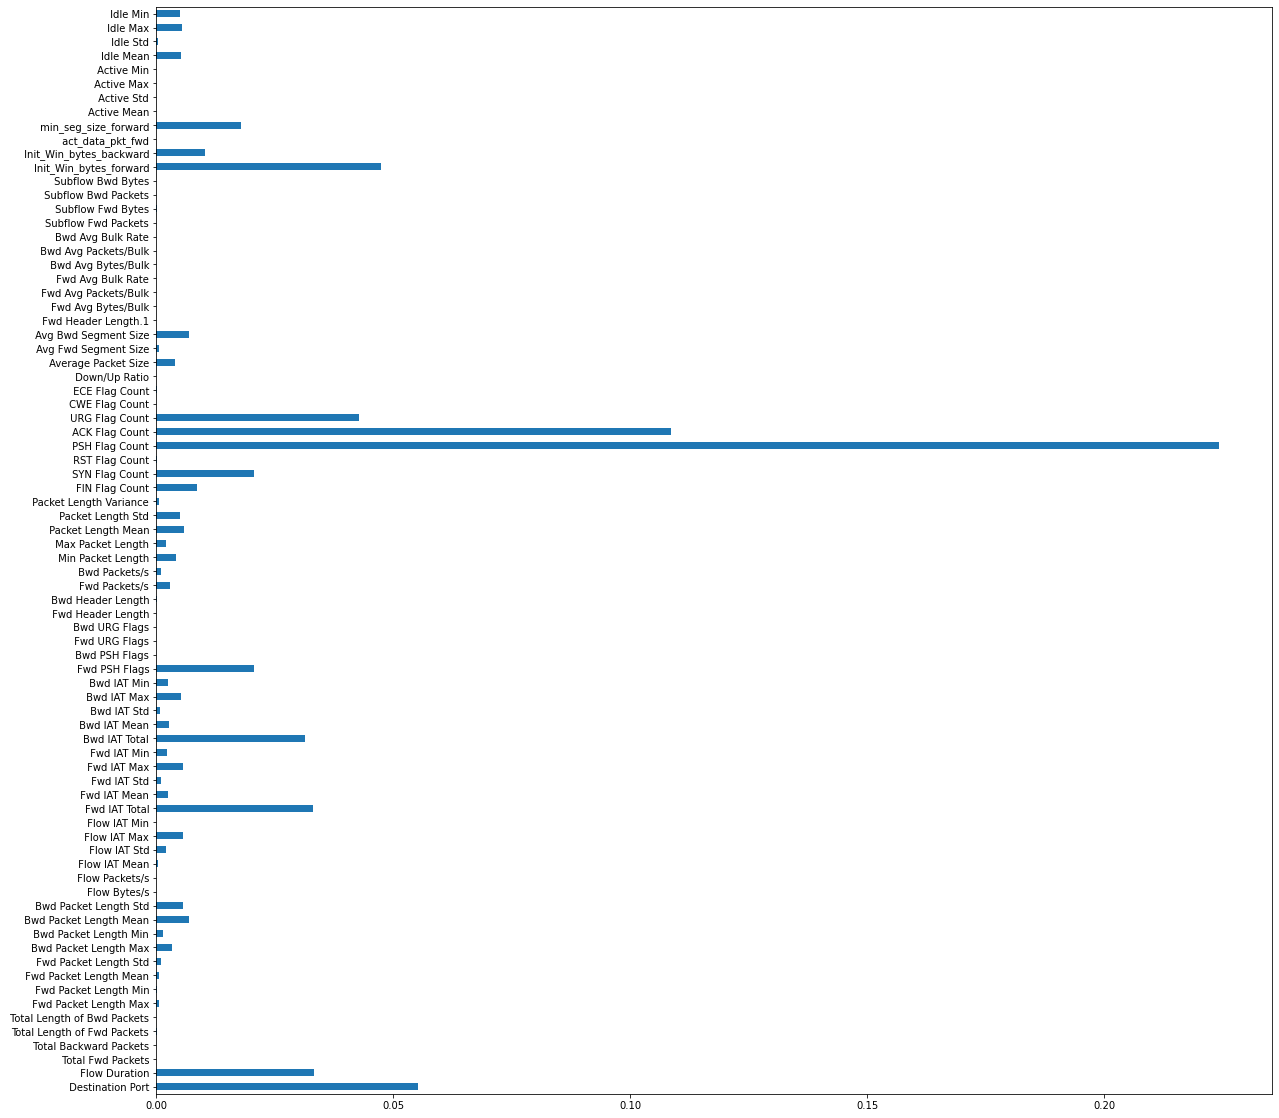

In [12]:
lowVarianceThreshold = 0.004
varinaces = df.var()
varinaces.plot(kind='barh', figsize =(20,20))


In [13]:
selectedColumns = varinaces[ varinaces > lowVarianceThreshold ]
filteredColumns = varinaces[ varinaces <= lowVarianceThreshold ]

In [14]:
selectedColumns.count()

25

In [15]:
filteredColumns.count()

43

In [16]:
# category A attacks
dfPortScan=df[df[' Label']=='PortScan']
# benign data
dfBenign=df[df[' Label']=='BENIGN']

In [17]:
dfBenign.describe()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,1.275220e+05,1.275220e+05,1.275220e+05,1.275220e+05,1.275220e+05,1.275220e+05,1.275220e+05,1.275220e+05,1.275220e+05,1.275220e+05,...,1.275220e+05,1.275220e+05,1.275220e+05,1.275220e+05,1.275220e+05,1.275220e+05,1.275220e+05,1.275220e+05,1.275220e+05,1.275220e+05
mean,1.119270e-01,9.984151e-02,1.774305e-03,1.831073e-03,2.250806e-03,8.483421e-04,1.297302e-02,1.496217e-02,1.551958e-02,1.558405e-02,...,1.886289e-03,4.228183e-01,6.954591e-04,7.312207e-04,1.589167e-03,4.427054e-04,2.918081e-02,1.949117e-03,3.000712e-02,2.793272e-02
std,2.670110e-01,2.627902e-01,9.283566e-03,1.160656e-02,1.191697e-02,1.066621e-02,3.393434e-02,2.225205e-02,3.249719e-02,4.823087e-02,...,1.076891e-02,1.051547e-01,6.326248e-03,5.549839e-03,9.933577e-03,5.743640e-03,1.042208e-01,2.583003e-02,1.066959e-01,1.028383e-01
min,1.529309e-11,8.333337e-15,3.206156e-10,2.751032e-10,4.303870e-12,1.398441e-13,7.179266e-11,6.793478e-10,2.930026e-10,2.823689e-10,...,4.863813e-10,1.666667e-08,9.090909e-15,1.418440e-14,9.090909e-15,9.090909e-15,8.333333e-15,1.418440e-14,8.333333e-15,8.333333e-15
25%,8.105339e-04,1.550001e-06,3.206159e-04,2.751034e-04,1.248122e-04,8.390649e-07,4.307560e-04,6.793478e-10,1.758016e-03,2.823689e-10,...,4.863813e-10,3.333334e-01,9.090909e-15,1.418440e-14,9.090909e-15,9.090909e-15,8.333333e-15,1.418440e-14,8.333333e-15,8.333333e-15
50%,1.223447e-03,2.580418e-04,3.206159e-04,5.502066e-04,2.926632e-04,1.971802e-05,2.871707e-03,4.076088e-03,1.084110e-02,2.823689e-10,...,4.863818e-04,3.333334e-01,9.090909e-15,1.418440e-14,9.090909e-15,9.090909e-15,8.333333e-15,1.418440e-14,8.333333e-15,8.333333e-15
75%,6.774840e-03,4.604996e-03,9.618471e-04,5.502066e-04,6.627961e-04,4.726731e-05,4.594730e-03,2.785326e-02,1.465013e-02,5.682565e-03,...,1.459144e-03,5.333333e-01,9.090909e-15,1.418440e-14,9.090909e-15,9.090909e-15,8.333333e-15,1.418440e-14,8.333333e-15,8.333333e-15
max,9.986389e-01,1.000000e+00,9.996794e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


### Benign Data

In [18]:
X=dfBenign[dfBenign.columns[0:-1]]
y=dfBenign[dfBenign.columns[-1]]



In [19]:
X=X[selectedColumns.index].copy()
X.head()

,Destination Port,Flow Duration,Bwd Packet Length Mean,Bwd Packet Length Std,Flow IAT Max,Fwd IAT Total,Fwd IAT Max,Bwd IAT Total,Bwd IAT Max,Fwd PSH Flags,...,PSH Flag Count,ACK Flag Count,URG Flag Count,Avg Bwd Segment Size,Init_Win_bytes_forward,Init_Win_bytes_backward,min_seg_size_forward,Idle Mean,Idle Max,Idle Min
0,0.000336,1.055285e-02,6.470582e-02,1.189384e-01,7.904475e-03,1.055285e-02,8.302700e-03,2.647258e-03,8.718000e-04,0.000001,...,1.000001,0.000001,0.000001,6.470582e-02,0.445563,0.003708,0.533333,8.333333e-15,8.333333e-15,8.333333e-15
1,0.000336,1.099461e-02,6.470582e-02,1.189384e-01,7.964917e-03,1.099461e-02,8.303525e-03,3.028575e-03,8.734583e-04,0.000001,...,1.000001,0.000001,0.000001,6.470582e-02,0.445563,0.003708,0.533333,8.333333e-15,8.333333e-15,8.333333e-15
2,0.000336,1.333334e-06,4.094127e-10,3.803897e-10,1.333333e-06,8.333333e-15,8.333333e-15,8.333333e-15,8.333333e-15,0.000001,...,0.000001,1.000001,1.000001,4.094127e-10,0.004425,0.003708,0.533333,8.333333e-15,8.333333e-15,8.333333e-15
3,0.000336,1.086240e-02,6.466771e-02,1.213905e-01,7.971258e-03,1.086240e-02,8.311308e-03,2.890425e-03,1.152458e-03,0.000001,...,1.000001,0.000001,0.000001,6.466771e-02,0.445563,0.003708,0.533333,8.333333e-15,8.333333e-15,8.333333e-15
4,0.541314,6.416669e-07,4.094127e-10,3.803897e-10,4.083333e-07,8.333333e-15,8.333333e-15,4.083333e-07,4.083333e-07,0.000001,...,0.000001,1.000001,1.000001,4.094127e-10,0.003708,0.004425,0.533333,8.333333e-15,8.333333e-15,8.333333e-15


In [20]:
s=X.describe()
for i in s.columns:
    print(i,s[i][7])

 Destination Port 0.9986389148174769
 Flow Duration 1.0000000000000082
 Bwd Packet Length Mean 1.0000000004094127
 Bwd Packet Length Std 0.9503805327017903
 Flow IAT Max 1.0000000000000082
Fwd IAT Total 1.0000000000000082
 Fwd IAT Max 1.0000000000000082
Bwd IAT Total 1.0000000000000082
 Bwd IAT Max 1.0000000000000082
Fwd PSH Flags 1.000001
 Min Packet Length 1.0000000034602077
 Packet Length Mean 1.000000000629723
 Packet Length Std 1.0000000004004774
FIN Flag Count 1.000001
 SYN Flag Count 1.000001
 PSH Flag Count 1.000001
 ACK Flag Count 1.000001
 URG Flag Count 1.000001
 Avg Bwd Segment Size 1.0000000004094127
Init_Win_bytes_forward 1.0000000000152591
 Init_Win_bytes_backward 1.0000000000152591
 min_seg_size_forward 1.0000000166666667
Idle Mean 1.0000000000000082
 Idle Max 1.0000000000000082
 Idle Min 1.0000000000000082


### Feature Selection

In [21]:
features=[" Fwd Packet Length Max"," Flow IAT Std"," Fwd Packet Length Std" ,"Fwd IAT Total",' Flow Duration', " Fwd Packet Length Mean", " Total Length of Bwd Packets", "Total Length of Fwd Packets", " Flow IAT Mean", " Bwd Packet Length Mean",  " Flow IAT Max", " Bwd Packet Length Std", ' Total Fwd Packets', ' Total Backward Packets']

In [22]:
pca = PCA(n_components=10)
pca_result = pca.fit_transform(X)

In [23]:
pca.explained_variance_ratio_

array([0.38562438, 0.21855687, 0.11091564, 0.087383  , 0.03835518,
       0.0341794 , 0.02946217, 0.0248387 , 0.02048582, 0.01754575])

In [24]:
pca_result

array([[ 0.56464338, -0.12292699, -0.59642741, ..., -0.18445022,
         0.15788181, -0.08313002],
       [ 0.56501781, -0.12254409, -0.59608877, ..., -0.18442333,
         0.15793408, -0.08308309],
       [-0.78493219,  0.49005953, -0.23881651, ...,  0.04643437,
        -0.11532381, -0.04786893],
       ...,
       [ 0.86605744, -0.04794656, -0.84178886, ...,  0.97440649,
        -0.06931032,  0.31725431],
       [ 0.80865065, -0.06259968, -0.79824382, ...,  0.76063161,
        -0.03948126,  0.24386004],
       [ 0.80895123, -0.06145685, -0.79834956, ...,  0.75536209,
        -0.03935832,  0.24125849]])

In [25]:
len(X.columns)

25

### Applying Algorithms

In [26]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=10)

In [27]:
#y_tn nnnnnnnnnnnnnnnnnnnnnest_arr=y_test.as_matrix()

#### PYOD

### Abnormal traffic

In [31]:
X_Anomaly=dfPortScan[selectedColumns.index].copy()
len(X_Anomaly.columns)

25

In [32]:
y_test_pred = clf.predict(X_Anomaly)  # outlier labels (0 or 1)

In [33]:
print("Total Samples : ",len(y_test_pred))
print( "Inliers : ",len(y_test_pred[y_test_pred == 0]))
print( "Outliers : ",len(y_test_pred[y_test_pred == 1]))

Total Samples :  158930
Inliers :  156339
Outliers :  2591


### ABOD

In [36]:
clf_name = 'ABOD'
clf = ABOD(contamination=0.1)
clf.fit(X_train)
y_test_pred = clf.predict(X_test)
print("Total Samples : ",len(y_test_pred))
print( "Inliers : ",len(y_test_pred[y_test_pred == 0]))
print( "Outliers : ",len(y_test_pred[y_test_pred == 1]))
y_test_pred = clf.predict(X_Anomaly)  # outlier labels (0 or 1)
print("Total Anomlus Samples : ",len(y_test_pred))
print( "Inliers : ",len(y_test_pred[y_test_pred == 0]))
print( "Outliers : ",len(y_test_pred[y_test_pred == 1]))

/home/muhammad.usman@ebryx.com/.local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3584: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/home/muhammad.usman@ebryx.com/.local/lib/python3.6/site-packages/numpy/core/_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/muhammad.usman@ebryx.com/.local/lib/python3.6/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/muhammad.usman@ebryx.com/.local/lib/python3.6/site-packages/pyod/models/base.py:365: RuntimeWarning: invalid value encountered in greater
  self.labels_ = (self.decision_scores_ > self.threshold_).astype(
/home/muhammad.usman@ebryx.com/.local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3584: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/home/muhammad.usman@ebryx.com/.local/lib/python3.6/site-package

Total Samples :  25505
Inliers :  25505
Outliers :  0
Total Anomlus Samples :  158930
Inliers :  158930
Outliers :  0


/home/muhammad.usman@ebryx.com/.local/lib/python3.6/site-packages/pyod/models/base.py:168: RuntimeWarning: invalid value encountered in greater
  return (pred_score > self.threshold_).astype('int').ravel()


In [40]:
clf_name = 'IForest'
clf = IsolationForest(contamination=0.001)
clf.fit(X_train)
y_test_pred = clf.predict(X_test)
print("Total Samples : ",len(y_test_pred))
print( "Inliers : ",len(y_test_pred[y_test_pred == 0]))
print( "Outliers : ",len(y_test_pred[y_test_pred == 1]))
y_test_pred = clf.predict(X_Anomaly)  # outlier labels (0 or 1)
print("Total Anomlus Samples : ",len(y_test_pred))
print( "Inliers : ",len(y_test_pred[y_test_pred == 0]))
print( "Outliers : ",len(y_test_pred[y_test_pred == 1]))

Total Samples :  25505
Inliers :  0
Outliers :  25486
Total Anomlus Samples :  158930
Inliers :  0
Outliers :  158922
